# Contents

01. Importing libraries
02. Importing data
03. Data quality check
04. Exploratory analysis
05. Exporting charts

### 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Allow matplotlib visuals
%matplotlib inline

### 02. Importing data

In [2]:
# Import main folder
path = r'C:\Users\amwil\OneDrive\Career Foundry Project Work\07-2021 ABNB NYC Data Analysis'

In [3]:
# Import AB_NYC_2019_cleaned.csv
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'AB_NYC_2019_Visually_Explored.csv'), index_col = False)

### 03. Data quality check

In [4]:
#Check beginning of df
df.head()

,Listing id,Host id,Borough,Neighborhood,Latitude,Longitude,Room type,Price,Minimum nights for rent,Number of reviews,Last review,Reviews per month,Number of listings per host,Availability per year,Price category
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19,0.210000,6,365,Middle price
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21,0.380000,2,355,High price
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,2019-06-23,1.373221,1,365,Middle price
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,2019-07-05,4.640000,1,194,Low price
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,2018-11-19,0.100000,1,0,Low price


In [5]:
# Check shape of df
df.shape

(48895, 15)

### 04. Exploratory analysis

#### Questions to answer:
##### 1. Which neighborhoods have rentals?
##### 2. What room types are available for rent?
##### 3. How does room type availability vary by location?
##### 4. What is the distribution of prices among the different room types? 
##### 5. What is the average price of rentals for each borough?


In [6]:
# View Neighborhood with listings
df.groupby(['Neighborhood'])['Borough'].agg(['count'])

,count
Neighborhood,
Allerton,42
Arden Heights,4
Arrochar,21
Arverne,77
Astoria,900
...,...
Windsor Terrace,157
Woodhaven,88
Woodlawn,11


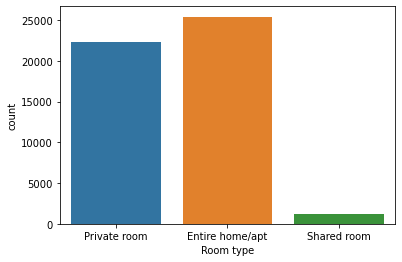

In [7]:
# View availability of room types
bar_1 = sns.countplot(data=df, x='Room type')
plt.show()

In [8]:
# View availability of room type by borough
df.groupby(['Room type','Borough'])['Room type'].agg(['count'])

count
Room type       Borough             
Entire home/apt Bronx            379
                Brooklyn        9559
                Manhattan      13199
                Queens          2096
                Staten Island    176
Private room    Bronx            652
                Brooklyn       10132
                Manhattan       7982
                Queens          3372
                Staten Island    188
Shared room     Bronx             60
                Brooklyn         413
                Manhattan        480
                Queens           198
                Staten Island      9

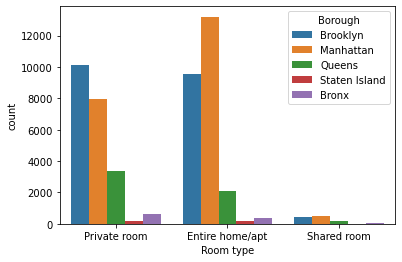

In [9]:
# Create visualization of availability of room type by borough
bar_2 = sns.countplot(data=df, x='Room type', hue='Borough')
plt.show()

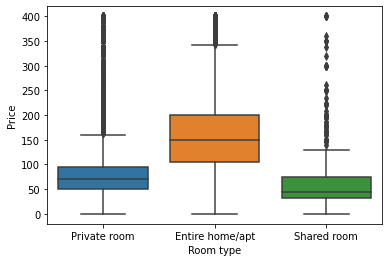

In [10]:
# View price distribution among the different room types
box_1 = sns.boxplot(data=df, x = 'Room type', y = 'Price')
plt.show()

In [11]:
# Find average price of rentals by room type for each borough
df.groupby(['Room type', 'Borough'])['Price'].agg(['mean'])

mean
Room type       Borough                  
Entire home/apt Bronx          116.635884
                Brooklyn       152.901559
                Manhattan      185.622926
                Queens         134.901240
                Staten Island  120.130682
Private room    Bronx           60.837423
                Brooklyn        70.997533
                Manhattan      101.020296
                Queens          66.671115
                Staten Island   62.292553
Shared room     Bronx           48.133333
                Brooklyn        49.014528
                Manhattan       81.789583
                Queens          48.060606
                Staten Island   57.444444

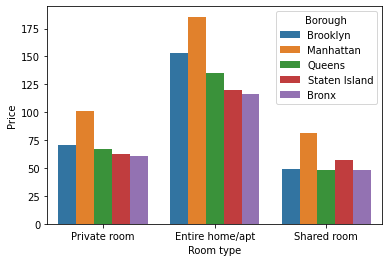

In [12]:
# Create visualization of average price by room type for each borough
bar_3 = sns.barplot(data=df, x='Room type', y='Price', hue = 'Borough', ci=False)

# Show visualization
plt.show()

### 05. Exporting charts

In [13]:
# Export box_1
box_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'box_1.png'))

In [14]:
# Export bar_1
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_1.png'))

In [15]:
# #Export bar_2
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_2.png'))

In [16]:
# Export bar_3
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_3.png'))